In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import os
import serial

In [3]:
path = '../archive/256_ObjectCategories'

In [4]:
tfms = get_transforms(do_flip=False,flip_vert=False, max_rotate=0,max_lighting=0.3, max_zoom=1.01)

In [5]:
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=tfms,
                                  size=128,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [6]:
arch = models.resnet50

In [29]:
pwd = !pwd
print(f'{pwd[0]}/model')

/media/data/ProgrammingWorkspace/Projects/aifr-project/pick-n-place/object-recognition-python/model


In [7]:
learner = cnn_learner(data, arch, metrics=accuracy, model_dir=f"{pwd}/model")

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


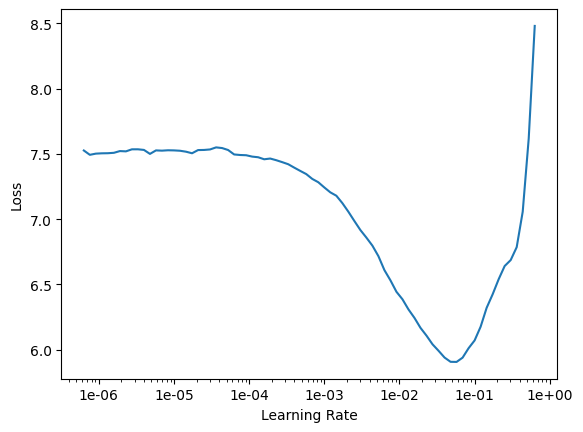

In [8]:
learner.lr_find()
learner.recorder.plot()

In [9]:
lr = 1e-01/2

In [10]:
learner.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.230222,1.856566,0.588956,31:58
1,3.245085,2.622403,0.530632,32:01
2,2.297685,5.671856,0.648260,40:31
3,1.377553,25.971542,0.746937,41:16
4,0.970964,18.267038,0.771606,39:19


In [11]:
learner.save('stage1')

In [12]:
learner.freeze()

In [14]:
learner.export('./export-model/cnn-1.pkl')